In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
import pandas as pd
import numpy as np
df = pd.read_csv('cars_cleaned.csv')
df.head(5)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,...,drive,size,type,paint_color,county_fips,county_name,state_fips,state_code,state_name,weather
0,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,...,rwd,NaN,coupe,red,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,...,fwd,full-size,sedan,grey,19143.0,Osceola,19.0,IA,Iowa,47.0
2,9900,2007.0,gmc,yukon,good,8 cylinders,gas,169000.0,clean,automatic,...,4wd,full-size,sedan,grey,46083.0,Lincoln,46.0,SD,South Dakota,38.0
3,12500,2015.0,jeep,patriot high altitude,like new,4 cylinders,gas,39500.0,rebuilt,automatic,...,4wd,sub-compact,SUV,grey,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
4,12995,2003.0,ford,excursion,excellent,10 cylinders,gas,236000.0,clean,automatic,...,4wd,sub-compact,SUV,blue,NaN,NaN,NaN,NaN,FAILED,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051134 entries, 0 to 1051133
Data columns (total 21 columns):
price           1051134 non-null int64
year            1051134 non-null float64
manufacturer    1051134 non-null object
make            1051134 non-null object
condition       1051134 non-null object
cylinders       1051134 non-null object
fuel            1051134 non-null object
odometer        1051134 non-null float64
title_status    1051134 non-null object
transmission    1051134 non-null object
vin             541624 non-null object
drive           1051134 non-null object
size            1051133 non-null object
type            1051134 non-null object
paint_color     1051134 non-null object
county_fips     1010181 non-null float64
county_name     1010181 non-null object
state_fips      1010181 non-null float64
state_code      1010181 non-null object
state_name      1051134 non-null object
weather         1009970 non-null float64
dtypes: float64(5), int64(1), object(15)
mem

In [3]:
drop_columns = [ 'make', 'title_status', 'vin', 'size']
df = df.drop(columns = drop_columns)
df = df.dropna()
df.head(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,county_fips,county_name,state_fips,state_code,state_name,weather
0,11900,2010.0,dodge,good,6 cylinders,gas,43600.0,automatic,rwd,coupe,red,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,2800,2004.0,ford,good,6 cylinders,gas,168591.0,automatic,fwd,sedan,grey,19143.0,Osceola,19.0,IA,Iowa,47.0
2,9900,2007.0,gmc,good,8 cylinders,gas,169000.0,automatic,4wd,sedan,grey,46083.0,Lincoln,46.0,SD,South Dakota,38.0
3,12500,2015.0,jeep,like new,4 cylinders,gas,39500.0,automatic,4wd,SUV,grey,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
51,8100,2009.0,cadillac,excellent,6 cylinders,gas,100098.0,automatic,rwd,sedan,red,48499.0,Wood,48.0,TX,Texas,67.0


**Label Processing**

In [4]:
from sklearn import preprocessing
import pandas as pd
# from the my kernel: https://www.kaggle.com/vbmokin/automatic-selection-from-20-classifier-models
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df.columns:
        le = preprocessing.LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,county_fips,county_name,state_fips,state_code,state_name,weather
0,11900,2010.0,14,2,5,2,43600.0,0,2,3,8,46083.0,945,46.0,40,40,38.0
1,2800,2004.0,17,2,5,2,168591.0,0,1,9,5,19143.0,1200,19.0,11,14,47.0
2,9900,2007.0,18,2,6,2,169000.0,0,0,9,5,46083.0,945,46.0,40,40,38.0
3,12500,2015.0,27,3,3,2,39500.0,0,0,0,5,46099.0,1073,46.0,40,40,38.0
51,8100,2009.0,8,0,5,2,100098.0,0,2,9,8,48499.0,1759,48.0,42,42,67.0


Split Train and Test data

In [5]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(807976, 16) (807976,)
(201994, 16) (201994,)


**Standard Scaler**: It assumes that your data is normally distributed within each feature. This is **not appropriate** for this data

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

**Min-max scaler:**

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [8]:
X_train

array([[0.63636364, 0.94117647, 0.4       , ..., 0.42857143, 0.42857143,
        0.32      ],
       [0.81818182, 0.52941176, 0.4       , ..., 0.42857143, 0.42857143,
        0.32      ],
       [0.36363636, 0.2745098 , 0.2       , ..., 0.93877551, 0.93877551,
        0.42      ],
       ...,
       [0.90909091, 0.68627451, 0.4       , ..., 0.42857143, 0.42857143,
        0.32      ],
       [0.60606061, 0.8627451 , 0.        , ..., 0.16326531, 0.16326531,
        0.72      ],
       [0.72727273, 0.33333333, 0.        , ..., 0.57142857, 0.53061224,
        0.34      ]])

 **Random Forest**

In [9]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [10]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [11]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2352.69
Mean Squared Error: 18973525.7
Root Mean Squared Error: 4355.86


Let's increase number of tress from 20 to 200

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [13]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2267.5
Mean Squared Error: 17915774.17
Root Mean Squared Error: 4232.7


With more trees, the model accuracy has increased slightly **(86.11% vs 86.79%)**

Visulization

In [14]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

**Variable Importance**

In [15]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.44
Variable: odometer             Importance: 0.12
Variable: drive                Importance: 0.09
Variable: fuel                 Importance: 0.08
Variable: manufacturer         Importance: 0.06
Variable: cylinders            Importance: 0.04
Variable: county_name          Importance: 0.04
Variable: type                 Importance: 0.03
Variable: county_fips          Importance: 0.03
Variable: paint_color          Importance: 0.02
Variable: weather              Importance: 0.02
Variable: condition            Importance: 0.01
Variable: transmission         Importance: 0.01
Variable: state_fips           Importance: 0.01
Variable: state_code           Importance: 0.01
Variable: state_name           Importance: 0.01


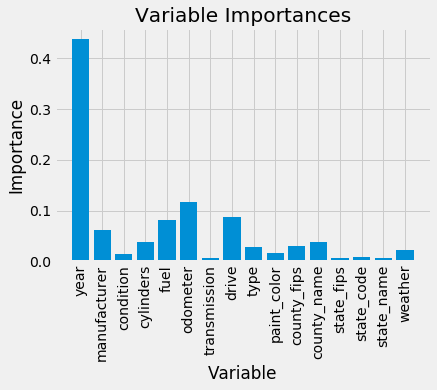

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

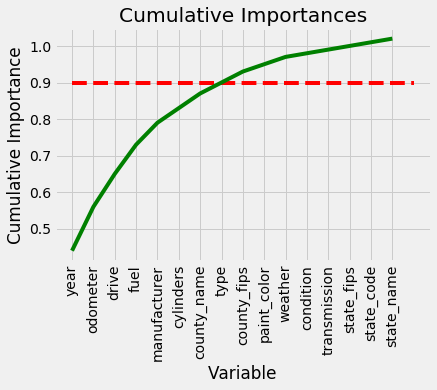

In [17]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [18]:
# Find number of features for cumulative importance of 90%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 8


New Random Forest with the most important seven features

In [19]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [20]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('drive'), 
                     feature_list.index('odometer'), feature_list.index('fuel'), feature_list.index('cylinders'), feature_list.index('manufacturer')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [21]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

MemoryError: could not allocate 58720256 bytes

Make pedictions with this filtered model

In [ ]:
predictions = rf_most_important.predict(test_important)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

This accuracy is slightly better than the full model (86.79 % vs 87.07). In addition, we this accuracy was obtained just by using 7 features instead of 13. Therefore, it can be considered as an improvement in both accuracy and efficiency.



---



---



# Ridge Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

First, linear regression will be applied
###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mse(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy = lr.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')
print('-------------Ridge Regression--------------')
print("RMSE = {:.2f}".format((rmse_rr)))

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

In [ ]:
OLS_pred= regressor.predict(X_train)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, OLS_pred)),2))

Check performance of the OLS on test data

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Evaluate OLS prediction on test data

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

### Ridge Regression

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

Finally, we refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, and examine the coefficient estimates.

In [ ]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

In [ ]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")



---



---



## **LASSO**

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),2))

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

In [ ]:
reg.alpha_

In [ ]:
coef

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
lasso001 = Lasso(alpha=100, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=100:", train_score001)
print ("test score for alpha =100: ", test_score001)
print ("number of features used: for alpha =100: ", coeff_used001)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [ ]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

######This means that we can make the best prediction by looking at two to six nearest neighbors of a data point. The number depends on the insight of the researcher.

Generating Model for K=6

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Model evaluation

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

# XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
# fit model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

predictions = xg_reg.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

##K-fold Cross Validation using XGBoost

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
A, b = X.iloc[:,:-1],X.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=A,label=b)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import seaborn as sns
xgb.plot_importance(xg_reg)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [ ]:
import seaborn as sns
xgb.plot_importance(xg_reg, importance_type= 'gain')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = [6,6]
plt.show()